# CALIDAD DE DATOS

<h1>Archivo : 3_2_internet_penetracion_100_hog_provincias.csv</h1> 

Importamos librerias

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

In [11]:
# Ignorar todos los warnings
warnings.filterwarnings("ignore")


Cargamos el archivo csv

In [12]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\3_2_internet_penetracion_100_hog_provincias.csv', sep=',', encoding='UTF-8')

In [13]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN


In [14]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


***Normalizamos el nombre y tipo de las columnas***

In [15]:
# Obtenemos el nombre de las columnas
df.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [16]:
# Convertir la columna 'Año' a objetos datetime
df['Año'] = pd.to_datetime(df['Año'], format='%Y').dt.year

In [17]:
# Convertir la columna 'provincia' a categórica
df['Provincia'] = df['Provincia'].astype('category')

In [18]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [19]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

In [20]:
df.describe()

,año,trimestre,unnamed:_4,unnamed:_5,unnamed:_6
count,864.000000,864.000000,0.0,0.0,0.0
mean,2018.000000,2.500000,NaN,NaN,NaN
std,2.583484,1.118682,NaN,NaN,NaN
min,2014.000000,1.000000,NaN,NaN,NaN
25%,2016.000000,1.750000,NaN,NaN,NaN
50%,2018.000000,2.500000,NaN,NaN,NaN
75%,2020.000000,3.250000,NaN,NaN,NaN
max,2022.000000,4.000000,NaN,NaN,NaN


***Verificamos la existencia de registros duplicados y nulos***

In [21]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,provincia,accesos_por_cada_100_hogares,unnamed:_4,unnamed:_5,unnamed:_6


In [22]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año                               0
trimestre                         0
provincia                         0
accesos_por_cada_100_hogares      0
unnamed:_4                      864
unnamed:_5                      864
unnamed:_6                      864
dtype: int64

In [23]:
# Eliminar las columnas que no tienen datos
columnas_a_eliminar = ['unnamed:_4', 'unnamed:_5', 'unnamed:_6']
df = df.drop(columns=columnas_a_eliminar)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   año                           864 non-null    int32   
 1   trimestre                     864 non-null    int64   
 2   provincia                     864 non-null    category
 3   accesos_por_cada_100_hogares  864 non-null    object  
dtypes: category(1), int32(1), int64(1), object(1)
memory usage: 18.6+ KB


In [25]:
df.head(1)

,año,trimestre,provincia,accesos_por_cada_100_hogares
0,2022,4,Buenos Aires,"78,94"


In [26]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df['accesos_por_cada_100_hogares'] = df['accesos_por_cada_100_hogares'].str.replace(',', '.')

In [27]:
# cambiamos el tipo a float
df['accesos_por_cada_100_hogares'] = df['accesos_por_cada_100_hogares'].astype(float)

In [28]:
# Crear una nueva columna "fecha" combinando las columnas "dia", "trimestre" y "año"
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + (df['trimestre']*3).astype(str) + '-' + '1', format='%Y-%m-%d')

In [29]:
df.head(1)

,año,trimestre,provincia,accesos_por_cada_100_hogares,fecha
0,2022,4,Buenos Aires,78.94,2022-12-01


Creamos una funcion para evaluar la columna

In [30]:
def graficar_columnas_en_funcion_del_tiempo(df, lista_valores, col_veloc):
    """
    Grafica varias columnas en un gráfico de líneas en función del tiempo.

    Parameters:
        - df: DataFrame que contiene los datos.
        - columnas: Lista de nombres de columnas a graficar.
        - fecha_column: Nombre de la columna que contiene las fechas.

    Returns:
        None
    """
      
    
    for valor in lista_valores:
        plt.figure(figsize=(8, 3))
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            color = 'C' + str(col_veloc.index(col))  # Asigna un color a cada columna
            plt.plot(df_x['fecha'], df_x[col], label=f'{col} ({valor})', marker='o', linestyle='-', color=color)
        plt.title('Gráfico de Líneas de Variables en Función del Tiempo')
        plt.xlabel('fecha')
        plt.ylabel(valor)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize='small')
        # Rotar las etiquetas del eje x para una mejor legibilidad
        plt.xticks(rotation=45)
        # Mostrar el gráfico
        plt.show()

In [31]:
# Obtener los valores únicos de 'columna1' y almacenarlos en una lista
valor_columna = df['provincia'].unique().tolist()

In [32]:
# Evaluamos la columna
a_evaluar = ['accesos_por_cada_100_hogares']

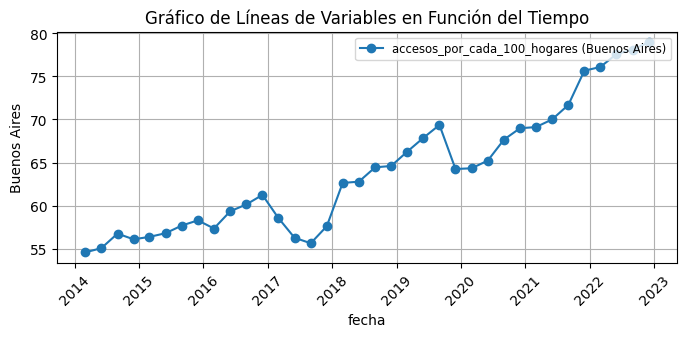

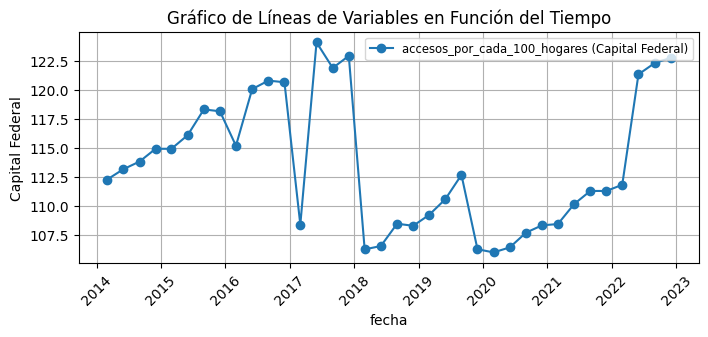

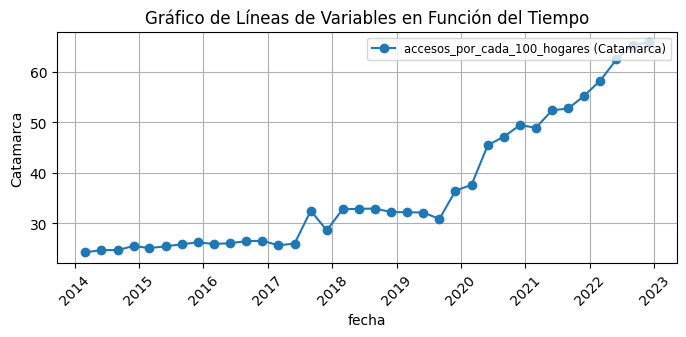

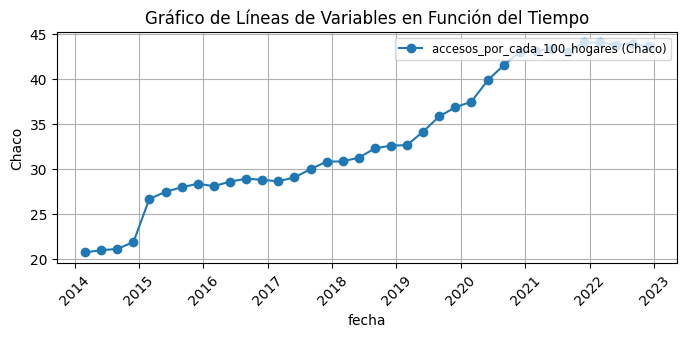

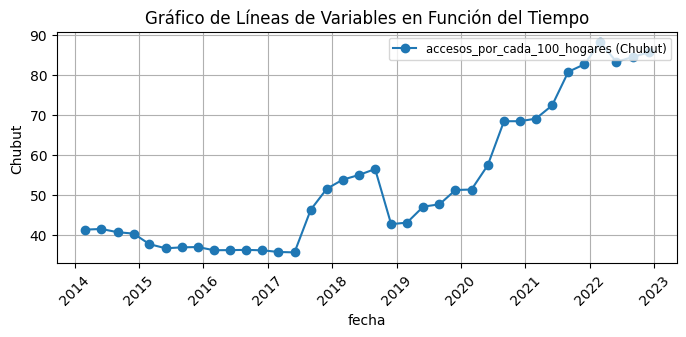

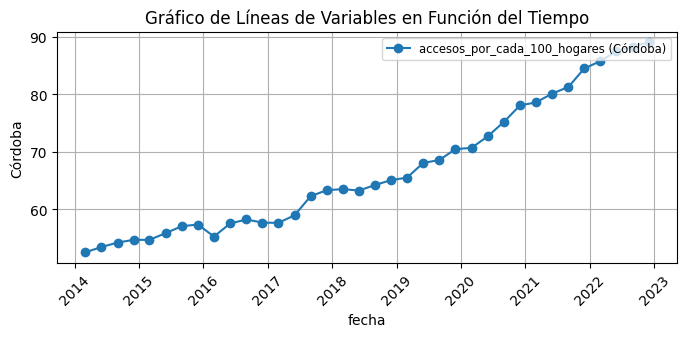

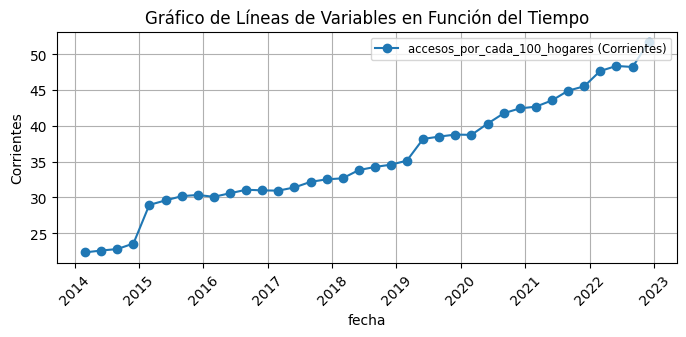

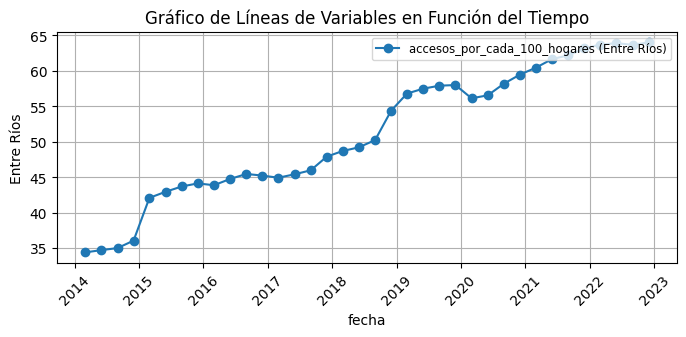

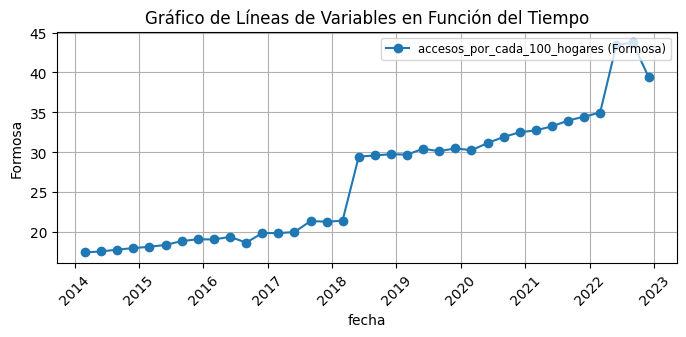

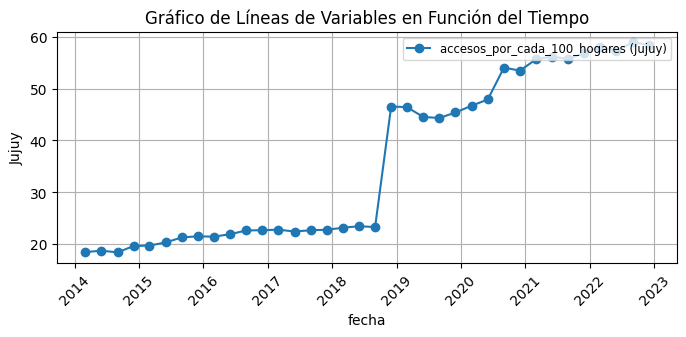

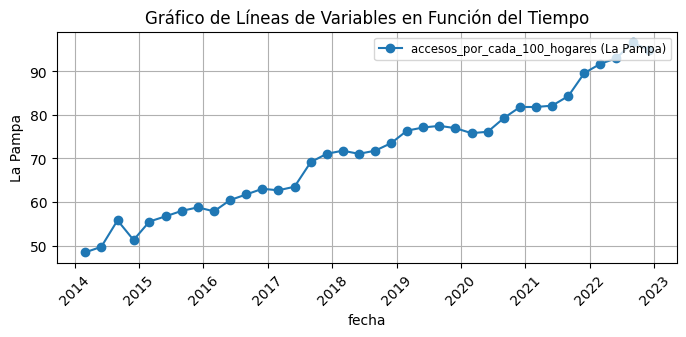

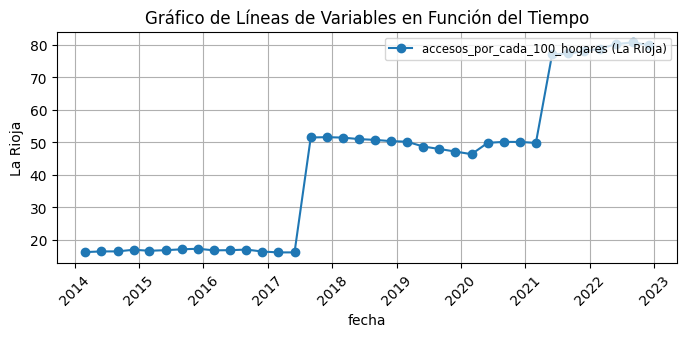

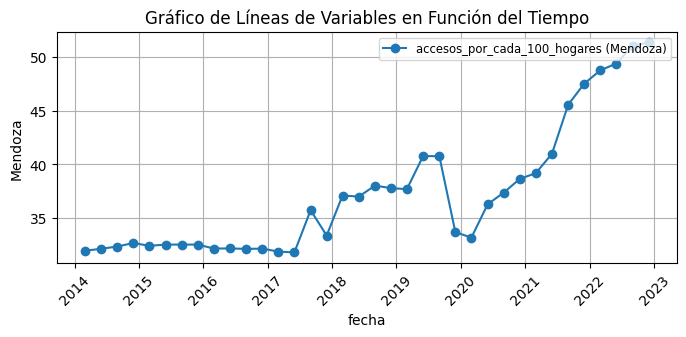

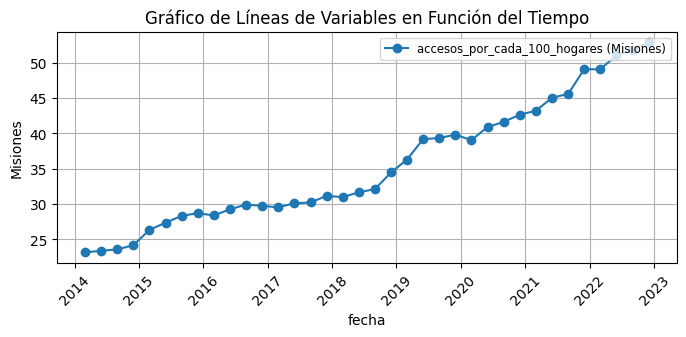

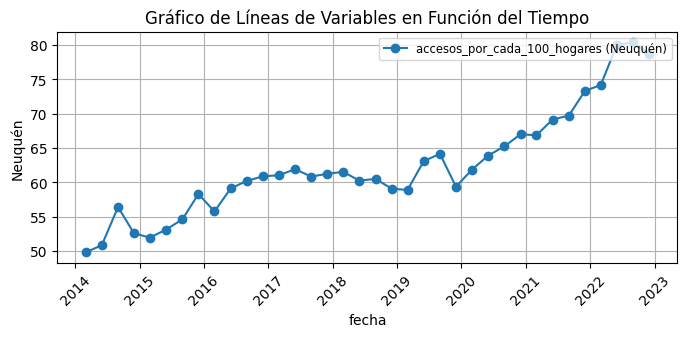

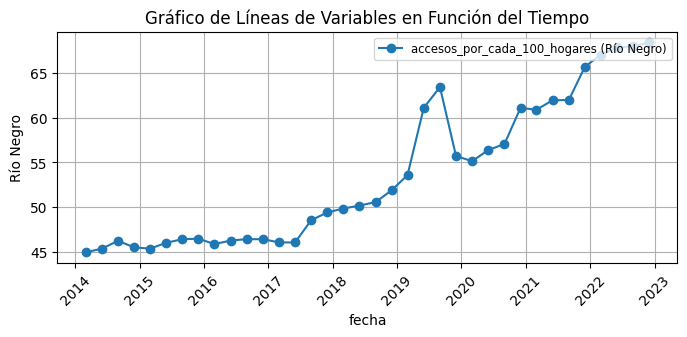

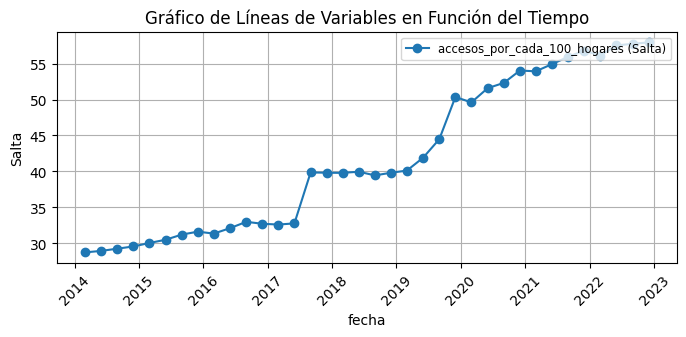

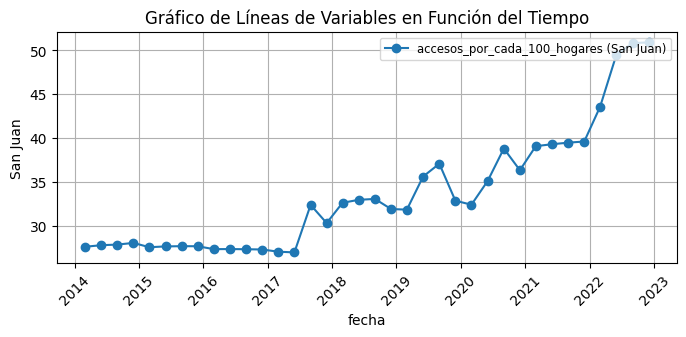

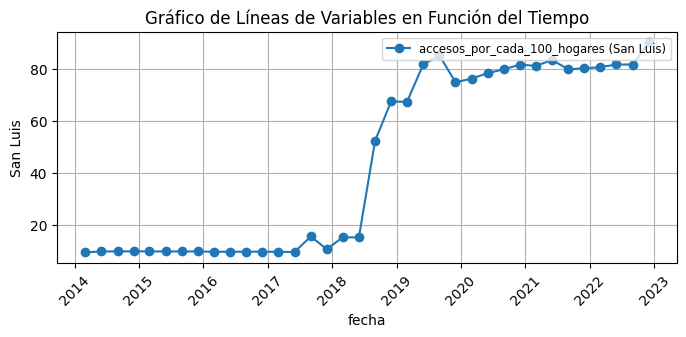

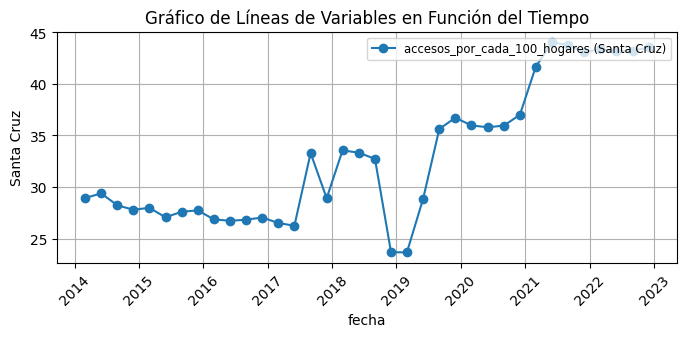

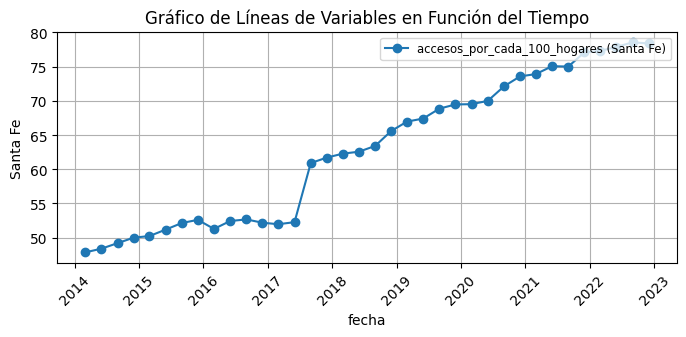

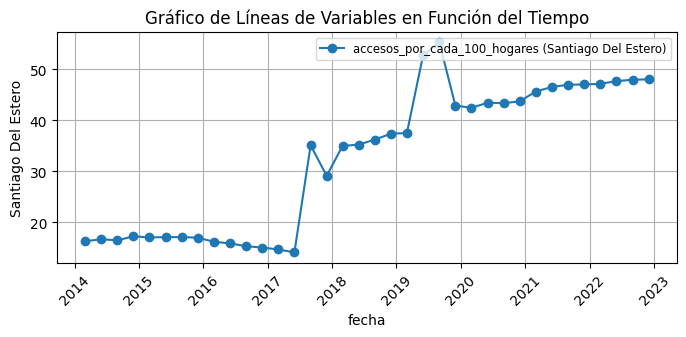

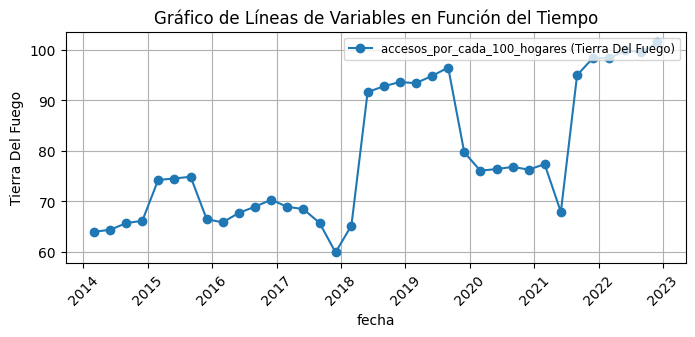

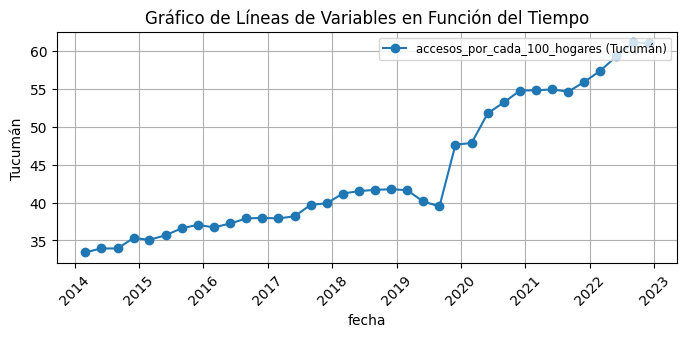

In [33]:
graficar_columnas_en_funcion_del_tiempo(df, valor_columna, a_evaluar)

*De los graficos por provincia surge revisar algunas por su comportamiento en el diagrama.*<br>
*Las provincias a analizar son: *
   - Capital Federal
   - Santa Cruz
   - Tierra del Fuego

<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***graficar_lin*** :          para hacer un grafico de lineas de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>
- ***reemplazar_outliers*** :   para realizar el reemplazo de/los valores aoutliers por la media de la columna


In [34]:
def graficar_box(data, columna):
    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    plt.show()
    return

In [35]:
def graficar_lin(data, columna):
    # Graficar la variable en un gráfico de barras en función del tiempo
    plt.figure(figsize=(8, 3))
    plt.plot(data['fecha'], data[columna], label= columna, marker='o', linestyle='-', color='blue')

    plt.title('Gráfico de Barras de Variable en Función del Tiempo')
    plt.xlabel('fecha')
    plt.ylabel('Velocidades de conexion')
    plt.grid(True)
    plt.legend()

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()
    return

In [36]:
def identificar_outliers(data, columna):
    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definimos el umbral (3 veces la desviación estándar)
    threshold = 3 * std_dev

    # Identificar valores que superen el umbral y almacenarlos en una lista
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))][columna].tolist()


    return outliers

In [37]:
def reemplazar_outliers(data, columna, lista):
    # Calcular la media'
    media = df[columna].mean()
    # Buscar los valores y asignarles el valor promedio si se encuentran
    for valor in lista:
        fila_indice = data.index[data[columna] == valor].tolist()
        if fila_indice:
            data.loc[fila_indice, columna] = media
    return

In [38]:
print(valor_columna)

['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']


<h3>Analizamos Capital Federal</h3>

In [39]:
df1 = df[df['provincia'] == 'Capital Federal']
df1.head(1)

,año,trimestre,provincia,accesos_por_cada_100_hogares,fecha
1,2022,4,Capital Federal,122.73,2022-12-01


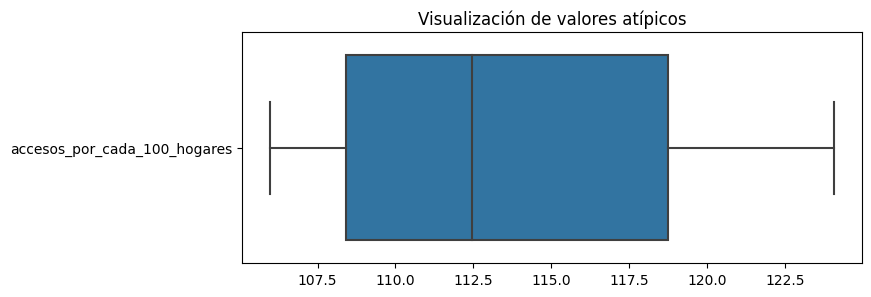

In [40]:
graficar_box(df1,['accesos_por_cada_100_hogares'])

In [41]:
identificar_outliers(df1, 'accesos_por_cada_100_hogares')

[]

Observamos que para Capital Federal no existen valores outliers

<h3>Analizamos Santa Cruz</h3>

In [42]:
df1 = df[df['provincia'] == 'Santa Cruz']
df1.head(1)

,año,trimestre,provincia,accesos_por_cada_100_hogares,fecha
19,2022,4,Santa Cruz,43.53,2022-12-01


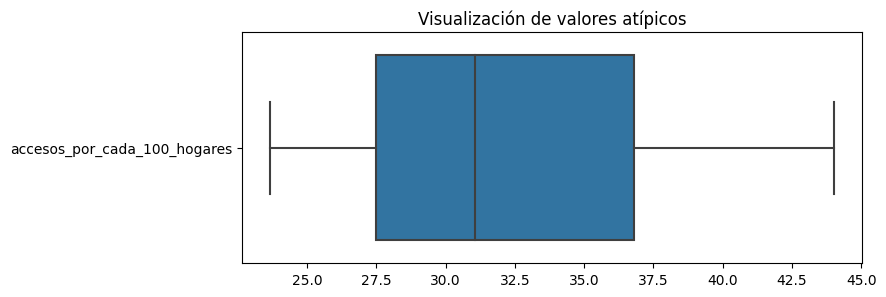

In [43]:
graficar_box(df1,['accesos_por_cada_100_hogares'])

In [44]:
identificar_outliers(df1, 'accesos_por_cada_100_hogares')

[]

Observamos que para Santa Cruz no existen valores outliers

<h3>Analizamos Tierra del Fuego</h3>

In [45]:
df1 = df[df['provincia'] == 'Tierra Del Fuego']
df1.head(1)

,año,trimestre,provincia,accesos_por_cada_100_hogares,fecha
22,2022,4,Tierra Del Fuego,101.44,2022-12-01


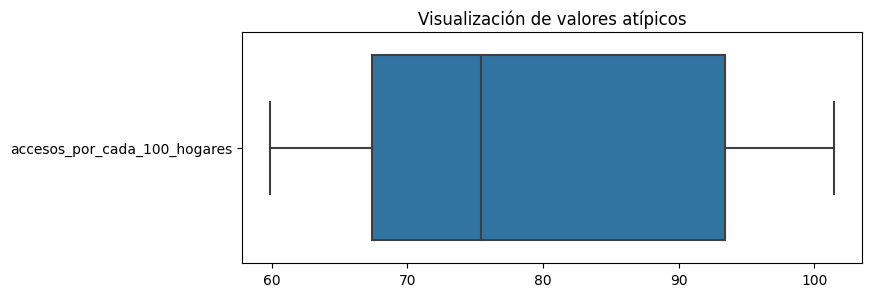

In [46]:
graficar_box(df1,['accesos_por_cada_100_hogares'])

In [47]:
identificar_outliers(df1, 'accesos_por_cada_100_hogares')

[]

Observamos que para Tierra Del Fuego no existen valores outliers

***Generamos archivo csv***

In [48]:
df.to_csv('../csvPi/3_2_internet_penetracion_100_hog_provincias.csv', index=False)